# Compare XGBoost and Deep Learning (DNN) Predictions

## Setup

In [1]:
import os
import pandas as pd

# Add current directory to path
os.sys.path.append(os.path.dirname(os.path.abspath('.')))

In [2]:
import protac_degradation_predictor as pdp

/opt/conda/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
import protac_degradation_predictor as pdp
import torch
from rdkit import Chem

In [4]:
protac_df = pdp.load_curated_dataset()
display(protac_df.head())

pDC50_threshold = 6.0
Dmax_threshold = 0.6

protac_df['E3 Ligase'] = protac_df['E3 Ligase'].str.replace('Iap', 'IAP')
protac_df['Active'] = protac_df.apply(
    lambda x: pdp.is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=pDC50_threshold, Dmax_threshold=Dmax_threshold), axis=1
)

protac_df = protac_df[~protac_df['Active'].isna()]

relevant_cols = ['Uniprot', 'Cell Line Identifier', 'Smiles', 'E3 Ligase', 'DC50 (nM)', 'Dmax (%)', 'Active']
display(protac_df[relevant_cols])

,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,Name,Assay (DC50/Dmax),Exact Mass,XLogP3,Target (Parsed),POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Cell Line Identifier,Active - OR
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C73H88ClF3N10O10S4/c1-47(49-13-15-51(...,SXPDUCVNMGMWBJ-FMZBIETASA-N,1486.282,101,10,24,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C74H90ClF3N10O10S4/c1-48(50-13-15-52(...,HQKUMELJMUNTTF-NMKDNUEVSA-N,1500.309,102,10,25,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C75H92ClF3N10O10S4/c1-49(51-16-18-53(...,ATQCEJKUPSBDMA-QARNUTPLSA-N,1514.336,103,10,26,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C76H94ClF3N10O10S4/c1-50(52-17-19-54(...,FNKQAGMHNFFSEI-DTTPTBRMSA-N,1528.363,104,10,27,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
4,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C77H96ClF3N10O10S4/c1-51(53-18-20-55(...,PXVFFBGSTYQHRO-REQIQPEASA-N,1542.390,105,10,28,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,True


,Uniprot,Cell Line Identifier,Smiles,E3 Ligase,DC50 (nM),Dmax (%),Active
4,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,53.0,100.0,True
7,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,93.0,90.0,True
60,P00533,H1975/WR,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,25.3,90.0,True
69,P00533,H1975/WR,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,5.9,100.0,True
72,Q9NWZ3,PH1-PBMCs-hiPSC4F1,COc1cc2c(OC[C@@H]3CCC(=O)N3)ncc(C#CCCCCCCCCCCC...,VHL,3000.0,50.0,False
...,...,...,...,...,...,...,...
2121,O60885,HEK293T,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,820.0,81.0,True
2122,O60885,HEK293T,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCC...,FEM1B,250.0,94.0,True
2125,O60885,HEK293T,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,1100.0,85.0,False
2126,O60885,HEK293T,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,3600.0,60.0,False


## Full Dataset

Get the predictions over the whole dataset:

NOTE: This will include the training set.

In [5]:
import pandas as pd
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

dnn_preds = []
xgb_preds = []
batch_size = 256

for i in range(0, len(protac_df), batch_size):
    # Accumulate the rows into a batch
    batch = protac_df.iloc[i:i+batch_size]
    if len(batch) == 0:
        continue
    
    # Get predictions for DNN model
    pred_dnn = pdp.get_protac_active_proba(
        protac_smiles=batch['Smiles'].tolist(),
        e3_ligase=batch['E3 Ligase'].tolist(),
        target_uniprot=batch['Uniprot'].tolist(),
        cell_line=batch['Cell Line Identifier'].tolist(),
        device=device,
    )
    
    for j in range(len(batch)):
        dnn_pred = {
            'mean': pred_dnn['mean'][j],
            'majority_vote': pred_dnn['majority_vote'][j],
        }
        for k in range(pred_dnn['preds'].shape[0]):  # Assuming num_models is 3
            dnn_pred[f'model_n{k}'] = pred_dnn['preds'][k][j]
        dnn_preds.append(dnn_pred)
    
    # Get predictions for XGBoost model
    pred_xgb = pdp.get_protac_active_proba(
        protac_smiles=batch['Smiles'].tolist(),
        e3_ligase=batch['E3 Ligase'].tolist(),
        target_uniprot=batch['Uniprot'].tolist(),
        cell_line=batch['Cell Line Identifier'].tolist(),
        device=device,
        use_xgboost_models=True,
    )
    
    for j in range(len(batch)):
        xgb_pred = {
            'mean': pred_xgb['mean'][j],
            'majority_vote': pred_xgb['majority_vote'][j],
        }
        for k in range(pred_xgb['preds'].shape[0]):  # Assuming num_models is 3
            xgb_pred[f'model_n{k}'] = pred_xgb['preds'][k][j]
        xgb_preds.append(xgb_pred)

# Convert accumulated predictions into DataFrames
dnn_df = pd.DataFrame(dnn_preds)
xgb_df = pd.DataFrame(xgb_preds)

# Concatenate the original DataFrame with predictions
result_df = pd.concat([
        protac_df.reset_index(drop=True),
        dnn_df.add_prefix('dnn_'),
        xgb_df.add_prefix('xgb_'),
    ], axis=1)

result_df

,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,dnn_mean,dnn_majority_vote,dnn_model_n0,dnn_model_n1,dnn_model_n2,xgb_mean,xgb_majority_vote,xgb_model_n0,xgb_model_n1,xgb_model_n2
0,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C77H96ClF3N10O10S4/c1-51(53-18-20-55(...,PXVFFBGSTYQHRO-REQIQPEASA-N,1542.390,105,10,28,...,0.926091,True,0.922488,0.971058,0.884728,0.977803,True,0.979807,0.972958,0.980646
1,8,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C76H96ClF3N10O9S4/c1-51(53-17-19-55(2...,FQLHSKINBMZPFV-WTFVIAODSA-N,1514.380,103,10,28,...,0.934987,True,0.938649,0.967957,0.898355,0.975625,True,0.975480,0.972628,0.978767
2,61,P00533,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,InChI=1S/C62H79N11O7S/c1-8-53(75)66-45-19-18-2...,HQGHIKHHXKBFOJ-OIQPADLRSA-N,1122.451,81,8,25,...,0.532295,True,0.651652,0.704779,0.240453,0.917975,True,0.946647,0.901747,0.905530
3,70,P00533,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,InChI=1S/C56H67N11O7S/c1-8-47(69)60-39-13-12-1...,CBWIPIZLLNOTMZ-PDMHGPQCSA-N,1038.289,75,8,19,...,0.586461,True,0.713173,0.802957,0.243252,0.922217,True,0.919568,0.927843,0.919240
4,73,Q9NWZ3,COc1cc2c(OC[C@@H]3CCC(=O)N3)ncc(C#CCCCCCCCCCCC...,VHL,InChI=1S/C51H65N7O8S/c1-32-45(67-31-55-32)34-2...,DFCKZXBDTTURLE-ABFWCBLXSA-N,936.189,67,6,21,...,0.378277,False,0.456931,0.610394,0.067505,0.103941,False,0.107219,0.095667,0.108936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,3262,O60885,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,InChI=1S/C38H41Cl2N9O5S/c1-23-24(2)55-38-35(23...,QVNLOGQWJMAEJT-LJAQVGFWSA-N,806.777,55,6,15,...,0.461836,False,0.631028,0.531522,0.222957,0.937156,True,0.934651,0.940516,0.936302
853,3263,O60885,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCC...,FEM1B,InChI=1S/C39H43Cl2N9O4S/c1-24-25(2)55-39-36(24...,IEXUFNUFUSSKQI-PMERELPUSA-N,804.805,55,6,15,...,0.478040,False,0.602999,0.603999,0.227121,0.512707,True,0.478524,0.512765,0.546831
854,3264,O60885,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,InChI=1S/C40H45Cl2N9O6S/c1-25-26(2)58-40-37(25...,CPDVGNBJFIONLX-HKBQPEDESA-N,850.830,58,6,18,...,0.410410,False,0.426177,0.582066,0.222986,0.118575,False,0.107306,0.111763,0.136655
855,3265,O60885,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,InChI=1S/C42H49Cl2N9O7S/c1-27-28(2)61-42-39(27...,QMBOIOPJFSHXPV-XIFFEERXSA-N,894.883,61,6,21,...,0.418736,False,0.438183,0.595072,0.222955,0.184872,False,0.159074,0.173036,0.222507


Describe columns with XGBoost predictions:

In [6]:
result_df.filter(like='xgb_').describe()

,xgb_mean,xgb_model_n0,xgb_model_n1,xgb_model_n2
count,857.000000,857.000000,857.000000,857.000000
mean,0.519258,0.519648,0.518779,0.519347
std,0.444579,0.443365,0.443698,0.447897
min,0.010143,0.010036,0.011076,0.008641
25%,0.030862,0.030901,0.033069,0.029464
50%,0.767127,0.766466,0.729913,0.788420
75%,0.961856,0.962569,0.961087,0.965674
max,0.988086,0.988136,0.986411,0.990691


Plot the distribution of the mean of the preditions of the "best" models:

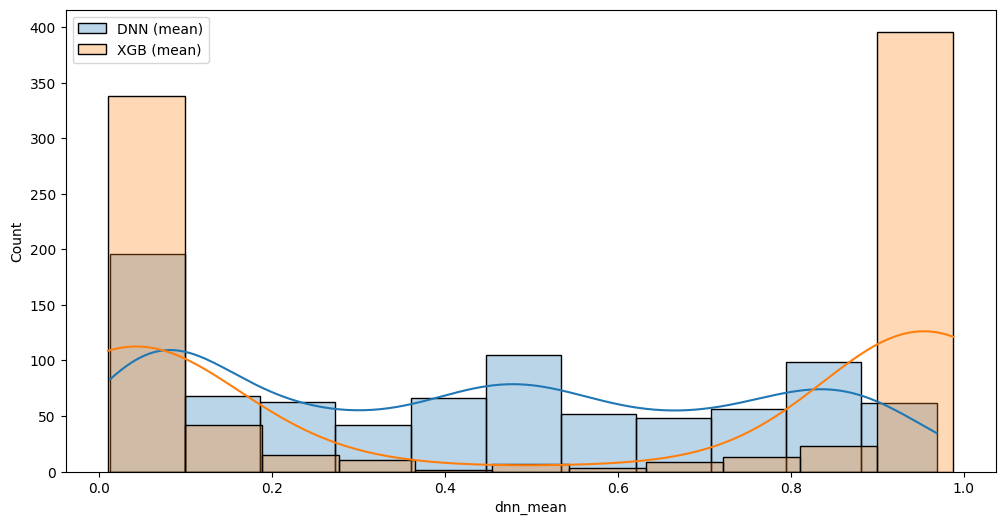

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Plot histogram of dnn_mean and xgb_mean
sns.histplot(result_df['dnn_mean'], label='DNN (mean)', kde=True, color='C0', alpha=0.3)
sns.histplot(result_df['xgb_mean'], label='XGB (mean)', kde=True, color='C1', alpha=0.3)
plt.legend()
plt.show()

Plot the distribution of the "best" models used in majority voting:

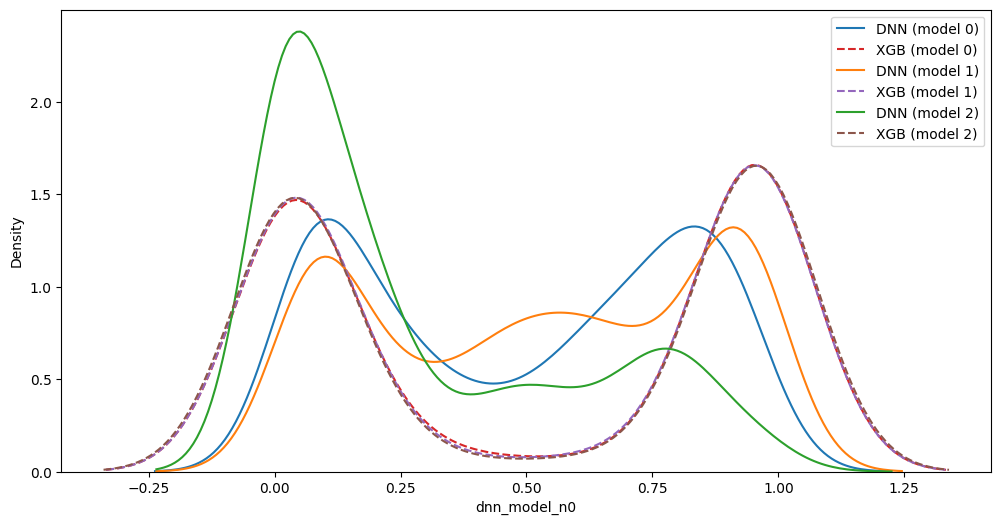

In [8]:
# Plot the KDE plots without histograms
plt.figure(figsize=(12, 6))
for i in range(3):
    sns.kdeplot(result_df[f'dnn_model_n{i}'], label=f'DNN (model {i})', color=f'C{i}')
    sns.kdeplot(result_df[f'xgb_model_n{i}'], label=f'XGB (model {i})', color=f'C{i+3}', linestyle='dashed')
plt.legend()
plt.show()

Get the entries for which the majority vote is different between DNN and XGBoost:

In [9]:
tmp = result_df[result_df['dnn_majority_vote'] != result_df['xgb_majority_vote']]
tmp[relevant_cols + ['dnn_majority_vote', 'xgb_majority_vote']]

,Uniprot,Cell Line Identifier,Smiles,E3 Ligase,DC50 (nM),Dmax (%),Active,dnn_majority_vote,xgb_majority_vote
5,Q9NWZ3,PH1-PBMCs-hiPSC4F1,CC[C@@H]1[C@H](F)C(=O)N[C@@H]1COc1ncc(C#CCCCCC...,VHL,259.0,90.0,True,False,True
6,Q9NWZ3,PH1-PBMCs-hiPSC4F1,CC[C@@H]1[C@H](F)C(=O)N[C@@H]1COc1ncc(C#CCN2CC...,VHL,151.0,90.0,True,False,True
60,P10275,LNCaP,CC(=O)N[C@H](C(=O)N1C[C@@H](O)C[C@@H]1C(=O)N[C...,VHL,NaN,5.0,False,True,False
61,O60885,22Rv1,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,CRBN,NaN,36.0,False,True,False
68,P10275,VCaP,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,15.0,76.0,True,False,True
...,...,...,...,...,...,...,...,...,...
831,P10415,293T FOXP3,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,47.0,False,True,False
844,Q07817,293T FOXP3,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,38.0,False,True,False
851,O60885,HEK293T,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,810.0,71.0,True,False,True
852,O60885,HEK293T,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,FEM1B,820.0,81.0,True,False,True


In [10]:
print(f'Number of entries for which the majority vote is different between DNN and XGBoost: {len(tmp)}')
print(f'Number of entries for which the majority vote of XGBoost is different from the Active column: {len(tmp[tmp["Active"] != tmp["xgb_majority_vote"]])}')
print(f'Number of entries for which the majority vote of DNN is different from the Active column: {len(tmp[tmp["Active"] != tmp["dnn_majority_vote"]])}')


Number of entries for which the majority vote is different between DNN and XGBoost: 134
Number of entries for which the majority vote of XGBoost is different from the Active column: 7
Number of entries for which the majority vote of DNN is different from the Active column: 127


### KL Divergence

Estimate and plot KL divergence between DNN and XGBoost predictions:

DNN vs. XGB model N.0: 7.322032476908708
DNN vs. XGB model N.1: 5.150240075698975
DNN vs. XGB model N.2: 6.874510246266886
DNN vs. XGB mean: 7.969119274983867
DNN vs. XGB majority vote: 0.07029106924951611
True vs. DNN majority voto: 0.004405425756712149
True vs. XGB majority voto: 0.03965522705930391


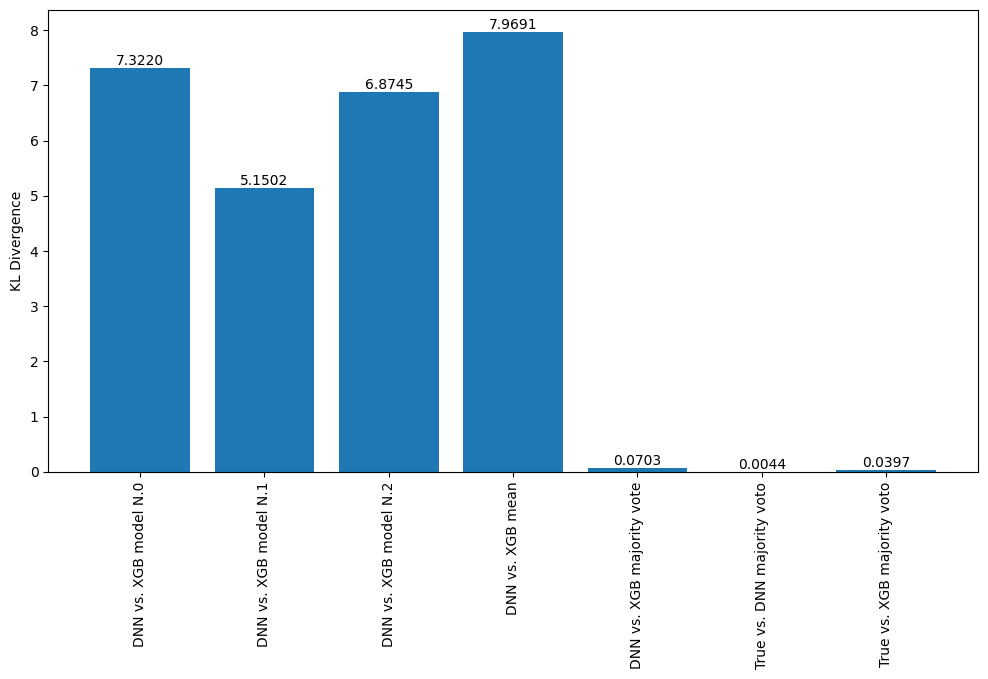

In [50]:
import numpy as np
from scipy.stats import entropy

def kl_divergence(p, q, bins=20):
    # Histogram bins
    hist_p, bin_edges = np.histogram(p, bins=bins, density=True)
    hist_q, _ = np.histogram(q, bins=bin_edges, density=True)

    # Make sure no zero values in densities (adjust as necessary)
    hist_p += 1e-10
    hist_q += 1e-10

    return entropy(hist_p, hist_q)


bins = 50
kl_divergences = {}
for i in range(3):
    kl_divergences[f'DNN vs. XGB model N.{i}'] = kl_divergence(result_df[f'dnn_model_n{i}'], result_df[f'xgb_model_n{i}'], bins=bins)

kl_divergences['DNN vs. XGB mean'] = kl_divergence(result_df['dnn_mean'], result_df['xgb_mean'], bins=bins)
kl_divergences['DNN vs. XGB majority vote'] = kl_divergence(result_df['dnn_majority_vote'].astype(int), result_df['xgb_majority_vote'].astype(int), bins=bins)

# Get df where the Active column is not NaN
active_df = result_df[~result_df['Active'].isna()]
kl_divergences['True vs. DNN majority voto'] = kl_divergence(active_df['Active'].astype(int), active_df['dnn_majority_vote'].astype(int), bins=bins)
kl_divergences['True vs. XGB majority voto'] = kl_divergence(active_df['Active'].astype(int), active_df['xgb_majority_vote'].astype(int), bins=bins)

for key, value in kl_divergences.items():
    print(f'{key}: {value}')

# Plot KL divergences
plt.figure(figsize=(12, 6))
plt.bar(kl_divergences.keys(), kl_divergences.values())
plt.ylabel('KL Divergence')
# Put values on top of the bars
for key, value in kl_divergences.items():
    plt.text(key, value, f'{value:.4f}', ha='center', va='bottom')
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

### ROC-AUC Curves

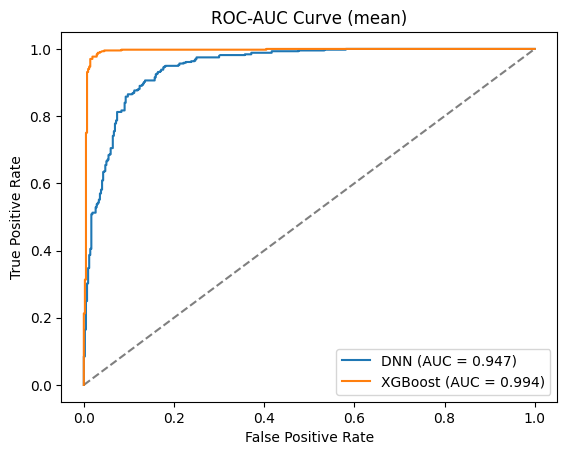

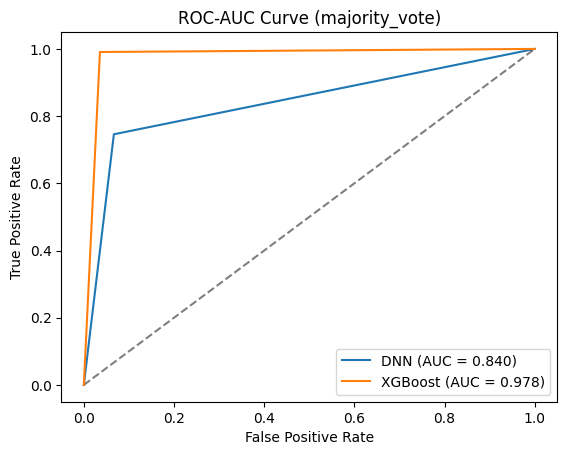

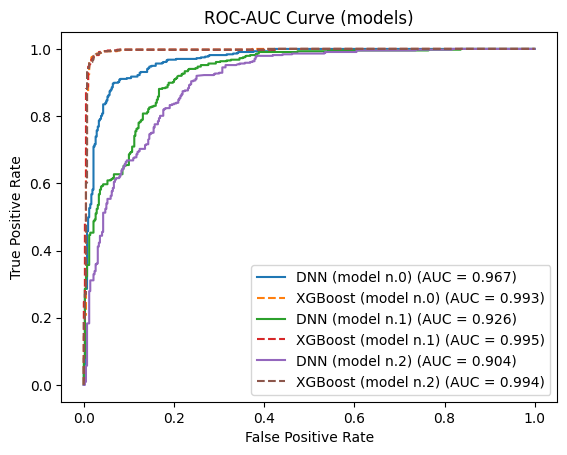

In [31]:
# Plot ROC-AUC curves for DNN and XGBoost models
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['dnn_mean'])
plt.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["dnn_mean"]):.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['xgb_mean'])
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["xgb_mean"]):.3f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (mean)')
plt.show()

fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['dnn_majority_vote'])
plt.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["dnn_majority_vote"]):.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['xgb_majority_vote'])
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["xgb_majority_vote"]):.3f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (majority_vote)')
plt.show()

for i in range(3):
    fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df[f'dnn_model_n{i}'])
    plt.plot(fpr, tpr, label=f'DNN (model n.{i}) (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df[f"dnn_model_n{i}"]):.3f})')
    fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df[f'xgb_model_n{i}'])
    plt.plot(fpr, tpr, label=f'XGBoost (model n.{i}) (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df[f"xgb_model_n{i}"]):.3f})', linestyle='dashed')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Curve (models)')
plt.show()


## Standard Split - Test Set

In [41]:
protac_df = pd.read_csv('data/studies/standard_test_10split_Active_Dmax_0.6_pDC50_6.0.csv')
# Drop column "Active"
protac_df.drop(columns='Active', inplace=True)
# Rename "Active (Dmax 0.6, pDC50 6.0)" column to "Active"
protac_df.rename(columns={'Active (Dmax 0.6, pDC50 6.0)': 'Active'}, inplace=True)
protac_df

,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Cell Line Identifier,Active - OR,Active,Avg Tanimoto,Uniprot Group,E3 Group,Tanimoto Group
0,2434,Q92769,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C48H62FN7O8S/c1-31-43(65-30-52-31)33-...,AGMBKWPLZPKEGR-OUZJXKGJSA-N,916.130,65,5,23,...,MAYSQGGGKKKVCYYYDGDIGNYYYGQGHPMKPHRIRMTHNLLLNY...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,HCT116-53BPI(+/-),False,False,0.378412,57,6,64
1,2004,Q9NWZ3,CC(C)Nc1cc(-n2ccc3cc(C#N)cnc32)ncc1C(=O)N[C@H]...,CRBN,InChI=1S/C41H42N10O8/c1-22(2)47-29-17-32(50-15...,YMXWKCAXGFLWAH-MONLTZSXSA-N,802.849,59,7,13,...,MNKPITPSTYVRCLNVGLIRKLSDFIDPQEGWKKLAVAIKKPSGDD...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,HEK293T,False,False,0.412830,63,0,95
2,549,P03372,CCN(CCCCCCCC(=O)N[C@H](C(=O)N1C[C@H](O)C[C@H]1...,VHL,InChI=1S/C55H65N5O8S2/c1-6-59(28-29-68-43-24-1...,IDYPSHVHIRZTPO-VADRYRRNSA-N,988.286,70,7,22,...,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MCF-7,False,False,0.374558,13,6,61
3,1098,P04035,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2cccc(OCCCc3cn(CCO...,CRBN,InChI=1S/C59H67FN8O13/c1-37(2)54-53(57(75)62-4...,FLZOWPIEHOMVRX-OEUTXLNUSA-N,1115.226,81,8,31,...,MLSRLFRMHGLFVASHPWEVIVGTVTLTICMMSMNMFTGNNKICGW...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,NaN,False,False,0.359937,14,0,47
4,937,O75530,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C43H48N10O6S/c1-26-36(60-25-48-26)29-...,PPNNFXIBKLCMTI-WXEAQWFJSA-N,832.988,60,7,15,...,MSEREVSTAPAGTDMPAAKKQKLSSDENSNPDLSGDENDDAVSIES...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,DB,False,True,0.406916,8,6,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1103,P04035,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2cccc(OCCCCCc3cn(C...,CRBN,InChI=1S/C63H75FN8O14/c1-41(2)58-57(61(79)66-4...,METKOBDLEKDPEQ-MOHJDXDLSA-N,1187.333,86,8,36,...,MLSRLFRMHGLFVASHPWEVIVGTVTLTICMMSMNMFTGNNKICGW...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,NaN,False,False,0.329734,14,0,21
82,2424,O15379,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C46H59N7O7S/c1-30-41(61-29-49-30)32-1...,QANLZMZKZIPVPD-DRTKLYQKSA-N,854.087,61,5,20,...,MAKTVAYFYDPDVGNFHYGAGHPMKPHRLALTHSLVLHYGLYKKMI...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,HCT116-53BPI(+/-),False,False,0.390991,3,6,75
83,335,O60885,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCn...,CRBN,InChI=1S/C41H41ClN10O8S/c1-22-23(2)61-41-34(22...,QDKBKEFTDKCTPJ-UFXYQILXSA-N,869.361,61,8,16,...,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,NCI-H661,False,False,0.376327,7,0,62
84,2520,P10275,CCN(c1ccc(C#N)c(Cl)c1)[C@H]1CC[C@H](NC(=O)c2cc...,CRBN,InChI=1S/C44H49ClN8O5/c1-2-52(35-10-5-29(27-46...,VZVAWYNZTBXESG-BULKPCKOSA-N,805.380,58,8,9,...,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,VCaP,True,True,0.390809,17,0,75


In [42]:
import pandas as pd
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

dnn_preds = []
xgb_preds = []
batch_size = 256

for i in range(0, len(protac_df), batch_size):
    # Accumulate the rows into a batch
    batch = protac_df.iloc[i:i+batch_size]
    if len(batch) == 0:
        continue
    
    # Get predictions for DNN model
    pred_dnn = pdp.get_protac_active_proba(
        protac_smiles=batch['Smiles'].tolist(),
        e3_ligase=batch['E3 Ligase'].tolist(),
        target_uniprot=batch['Uniprot'].tolist(),
        cell_line=batch['Cell Line Identifier'].tolist(),
        device=device,
    )
    
    for j in range(len(batch)):
        dnn_pred = {
            'mean': pred_dnn['mean'][j],
            'majority_vote': pred_dnn['majority_vote'][j],
        }
        for k in range(pred_dnn['preds'].shape[0]):  # Assuming num_models is 3
            dnn_pred[f'model_n{k}'] = pred_dnn['preds'][k][j]
        dnn_preds.append(dnn_pred)
    
    # Get predictions for XGBoost model
    pred_xgb = pdp.get_protac_active_proba(
        protac_smiles=batch['Smiles'].tolist(),
        e3_ligase=batch['E3 Ligase'].tolist(),
        target_uniprot=batch['Uniprot'].tolist(),
        cell_line=batch['Cell Line Identifier'].tolist(),
        device=device,
        use_xgboost_models=True,
    )
    
    for j in range(len(batch)):
        xgb_pred = {
            'mean': pred_xgb['mean'][j],
            'majority_vote': pred_xgb['majority_vote'][j],
        }
        for k in range(pred_xgb['preds'].shape[0]):  # Assuming num_models is 3
            xgb_pred[f'model_n{k}'] = pred_xgb['preds'][k][j]
        xgb_preds.append(xgb_pred)

# Convert accumulated predictions into DataFrames
dnn_df = pd.DataFrame(dnn_preds)
xgb_df = pd.DataFrame(xgb_preds)

# Concatenate the original DataFrame with predictions
result_df = pd.concat([
        protac_df.reset_index(drop=True),
        dnn_df.add_prefix('dnn_'),
        xgb_df.add_prefix('xgb_'),
    ], axis=1)

result_df

,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,dnn_mean,dnn_majority_vote,dnn_model_n0,dnn_model_n1,dnn_model_n2,xgb_mean,xgb_majority_vote,xgb_model_n0,xgb_model_n1,xgb_model_n2
0,2434,Q92769,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C48H62FN7O8S/c1-31-43(65-30-52-31)33-...,AGMBKWPLZPKEGR-OUZJXKGJSA-N,916.130,65,5,23,...,0.079379,False,0.170209,0.063416,0.004514,0.026209,False,0.024188,0.029409,0.025029
1,2004,Q9NWZ3,CC(C)Nc1cc(-n2ccc3cc(C#N)cnc32)ncc1C(=O)N[C@H]...,CRBN,InChI=1S/C41H42N10O8/c1-22(2)47-29-17-32(50-15...,YMXWKCAXGFLWAH-MONLTZSXSA-N,802.849,59,7,13,...,0.435443,False,0.269258,0.663059,0.374012,0.721998,True,0.766466,0.608752,0.790776
2,549,P03372,CCN(CCCCCCCC(=O)N[C@H](C(=O)N1C[C@H](O)C[C@H]1...,VHL,InChI=1S/C55H65N5O8S2/c1-6-59(28-29-68-43-24-1...,IDYPSHVHIRZTPO-VADRYRRNSA-N,988.286,70,7,22,...,0.257002,False,0.435150,0.277998,0.057857,0.199748,False,0.306645,0.227117,0.065481
3,1098,P04035,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2cccc(OCCCc3cn(CCO...,CRBN,InChI=1S/C59H67FN8O13/c1-37(2)54-53(57(75)62-4...,FLZOWPIEHOMVRX-OEUTXLNUSA-N,1115.226,81,8,31,...,0.048816,False,0.046254,0.098125,0.002068,0.010581,False,0.010565,0.012536,0.008641
4,937,O75530,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C43H48N10O6S/c1-26-36(60-25-48-26)29-...,PPNNFXIBKLCMTI-WXEAQWFJSA-N,832.988,60,7,15,...,0.538979,True,0.644068,0.732764,0.240103,0.902249,True,0.873345,0.916330,0.917072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1103,P04035,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2cccc(OCCCCCc3cn(C...,CRBN,InChI=1S/C63H75FN8O14/c1-41(2)58-57(61(79)66-4...,METKOBDLEKDPEQ-MOHJDXDLSA-N,1187.333,86,8,36,...,0.042708,False,0.052732,0.073325,0.002068,0.010631,False,0.010794,0.012440,0.008659
82,2424,O15379,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C46H59N7O7S/c1-30-41(61-29-49-30)32-1...,QANLZMZKZIPVPD-DRTKLYQKSA-N,854.087,61,5,20,...,0.146975,False,0.251751,0.182186,0.006988,0.616503,True,0.532181,0.683957,0.633372
83,335,O60885,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCn...,CRBN,InChI=1S/C41H41ClN10O8S/c1-22-23(2)61-41-34(22...,QDKBKEFTDKCTPJ-UFXYQILXSA-N,869.361,61,8,16,...,0.190578,False,0.189161,0.351043,0.031529,0.029169,False,0.033773,0.033058,0.020677
84,2520,P10275,CCN(c1ccc(C#N)c(Cl)c1)[C@H]1CC[C@H](NC(=O)c2cc...,CRBN,InChI=1S/C44H49ClN8O5/c1-2-52(35-10-5-29(27-46...,VZVAWYNZTBXESG-BULKPCKOSA-N,805.380,58,8,9,...,0.558503,True,0.788242,0.655330,0.231937,0.910048,True,0.901576,0.915484,0.913085


In [43]:
result_df.filter(like='xgb_').describe()

,xgb_mean,xgb_model_n0,xgb_model_n1,xgb_model_n2
count,86.000000,86.000000,86.000000,86.000000
mean,0.556621,0.560646,0.551290,0.557927
std,0.376574,0.377049,0.378438,0.384407
min,0.010581,0.010565,0.012440,0.008641
25%,0.139769,0.149495,0.137282,0.128790
50%,0.655310,0.669479,0.657044,0.661293
75%,0.934663,0.938701,0.934932,0.932825
max,0.983716,0.984821,0.984761,0.984929


Plot the distribution of the mean of the preditions of the "best" models:

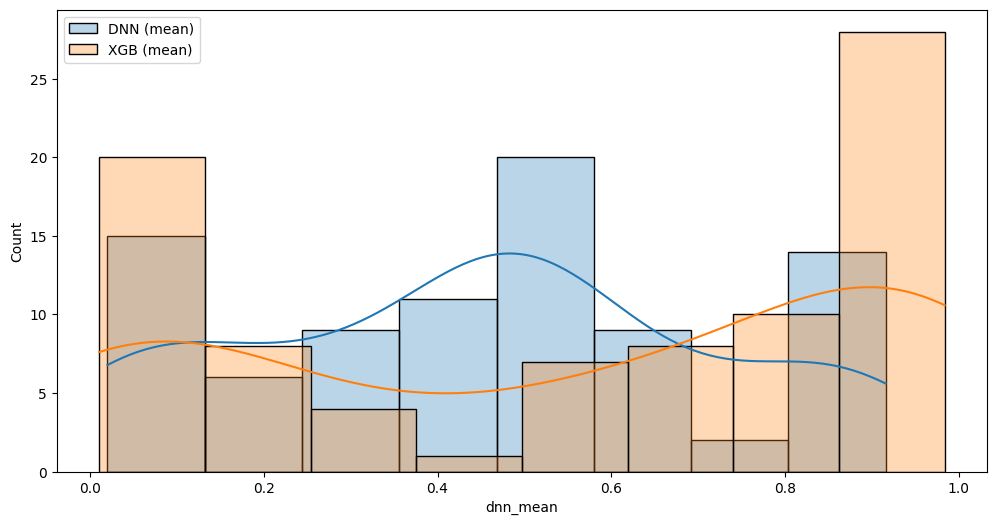

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Plot histogram of dnn_mean and xgb_mean
sns.histplot(result_df['dnn_mean'], label='DNN (mean)', kde=True, color='C0', alpha=0.3)
sns.histplot(result_df['xgb_mean'], label='XGB (mean)', kde=True, color='C1', alpha=0.3)
plt.legend()
plt.show()

Plot the distribution of the "best" models used in majority voting:

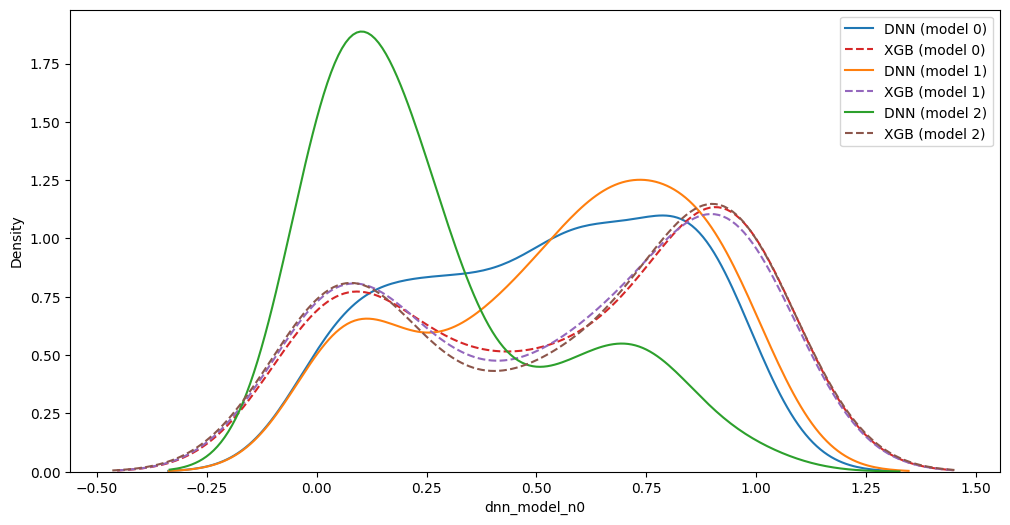

In [45]:
# Plot the KDE plots without histograms
plt.figure(figsize=(12, 6))
for i in range(3):
    sns.kdeplot(result_df[f'dnn_model_n{i}'], label=f'DNN (model {i})', color=f'C{i}')
    sns.kdeplot(result_df[f'xgb_model_n{i}'], label=f'XGB (model {i})', color=f'C{i+3}', linestyle='dashed')
plt.legend()
plt.show()

Get the entries for which the majority vote is different between DNN and XGBoost:

In [46]:
tmp = result_df[result_df['dnn_majority_vote'] != result_df['xgb_majority_vote']]
tmp[relevant_cols + ['dnn_majority_vote', 'xgb_majority_vote']]

,Uniprot,Cell Line Identifier,Smiles,E3 Ligase,DC50 (nM),Dmax (%),Active,dnn_majority_vote,xgb_majority_vote
1,Q9NWZ3,HEK293T,CC(C)Nc1cc(-n2ccc3cc(C#N)cnc32)ncc1C(=O)N[C@H]...,CRBN,NaN,46.0,False,False,True
7,Q06187,THP-1,NC(=O)c1c(-c2ccc(Oc3ccc(F)cc3F)cc2)nn([C@@H]2C...,CRBN,398.5,68.0,True,False,True
13,P11802,Jurkat,CC(=O)c1c(C)c2cnc(Nc3ccc(N4CCN(CC(=O)NCCOCCOCC...,VHL,2512.0,NaN,False,True,False
14,P10275,VCaP,N#Cc1ccc(O[C@H]2CC[C@H](NC(=O)c3ccc(N4CCN(CCNc...,CRBN,0.8,77.0,True,False,True
30,P00533,NCI-H3255,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCCCOCCOCC...,VHL,22.3,96.6,True,False,True
36,P33981,HCT 116,CCC(=O)N[C@H]1CC[C@@H](n2c(=O)cc(C)c3cnc(Nc4cc...,CRBN,25.4,57.0,False,False,True
44,Q06187,Ramos,NC(=O)c1c(-c2ccc(Oc3ccc(F)cc3F)cc2)nn([C@@H]2C...,CRBN,36.9,85.0,True,False,True
48,Q9NWZ3,HEK293T,CC(C)Nc1cc(-n2ccc3cc(C#N)cnc32)ncc1C(=O)N[C@H]...,CRBN,190.0,93.0,True,False,True
50,Q9UM73,SR,CCc1cc2c(cc1N1CCC(N3CCN(C(=O)CNc4cccc5c4CN(C4C...,CRBN,6.1,87.7,True,False,True
53,P10275,VCaP,N#Cc1ccc(O[C@H]2CC[C@H](NC(=O)c3ccc(NCCCCCCCCC...,CRBN,1000.0,42.0,False,False,True


In [47]:
print(f'Number of entries for which the majority vote is different between DNN and XGBoost: {len(tmp)}')
print(f'Number of entries for which the majority vote of XGBoost is different from the Active column: {len(tmp[tmp["Active"] != tmp["xgb_majority_vote"]])}')
print(f'Number of entries for which the majority vote of DNN is different from the Active column: {len(tmp[tmp["Active"] != tmp["dnn_majority_vote"]])}')


Number of entries for which the majority vote is different between DNN and XGBoost: 18
Number of entries for which the majority vote of XGBoost is different from the Active column: 7
Number of entries for which the majority vote of DNN is different from the Active column: 11


### KL Divergence

Estimate and plot KL divergence between DNN and XGBoost predictions:

DNN vs. XGB model N.0: 7.322032476908708
DNN vs. XGB model N.1: 5.150240075698975
DNN vs. XGB model N.2: 6.874510246266886
DNN vs. XGB mean: 7.969119274983867
DNN vs. XGB majority vote: 0.07029106924951611
True vs. DNN majority vote: 0.004405425756712149
True vs. XGB majority vote: 0.03965522705930391


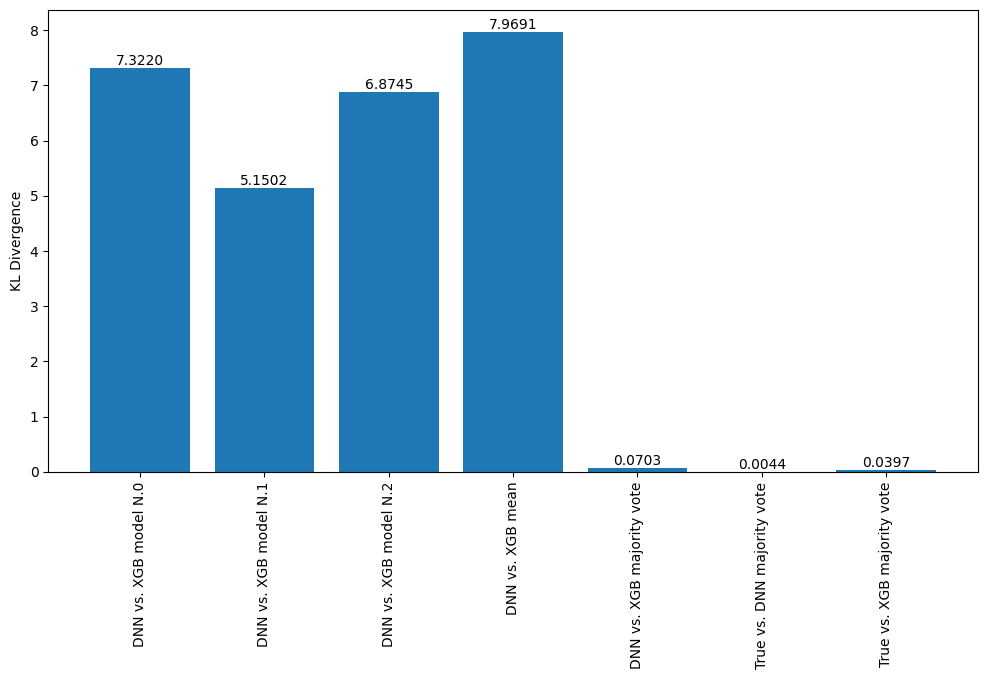

In [49]:
import numpy as np
from scipy.stats import entropy

def kl_divergence(p, q, bins=20):
    # Histogram bins
    hist_p, bin_edges = np.histogram(p, bins=bins, density=True)
    hist_q, _ = np.histogram(q, bins=bin_edges, density=True)

    # Make sure no zero values in densities (adjust as necessary)
    hist_p += 1e-10
    hist_q += 1e-10

    return entropy(hist_p, hist_q)


bins = 50
kl_divergences = {}
for i in range(3):
    kl_divergences[f'DNN vs. XGB model N.{i}'] = kl_divergence(result_df[f'dnn_model_n{i}'], result_df[f'xgb_model_n{i}'], bins=bins)

kl_divergences['DNN vs. XGB mean'] = kl_divergence(result_df['dnn_mean'], result_df['xgb_mean'], bins=bins)
kl_divergences['DNN vs. XGB majority vote'] = kl_divergence(result_df['dnn_majority_vote'].astype(int), result_df['xgb_majority_vote'].astype(int), bins=bins)

# Get df where the Active column is not NaN
active_df = result_df[~result_df['Active'].isna()]
kl_divergences['True vs. DNN majority vote'] = kl_divergence(active_df['Active'].astype(int), active_df['dnn_majority_vote'].astype(int), bins=bins)
kl_divergences['True vs. XGB majority vote'] = kl_divergence(active_df['Active'].astype(int), active_df['xgb_majority_vote'].astype(int), bins=bins)

for key, value in kl_divergences.items():
    print(f'{key}: {value}')

# Plot KL divergences
plt.figure(figsize=(12, 6))
plt.bar(kl_divergences.keys(), kl_divergences.values())
plt.ylabel('KL Divergence')
# Put values on top of the bars
for key, value in kl_divergences.items():
    plt.text(key, value, f'{value:.4f}', ha='center', va='bottom')
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

### ROC-AUC Curves

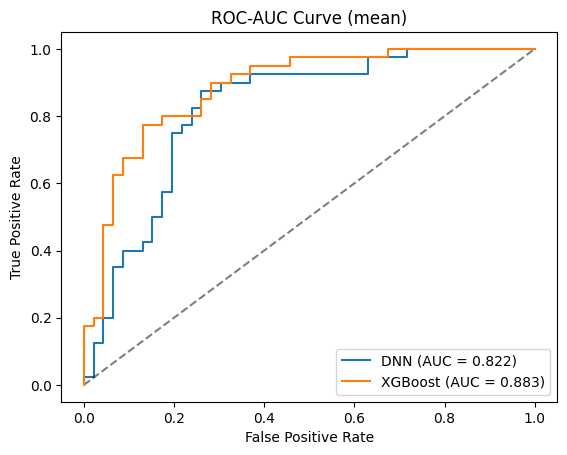

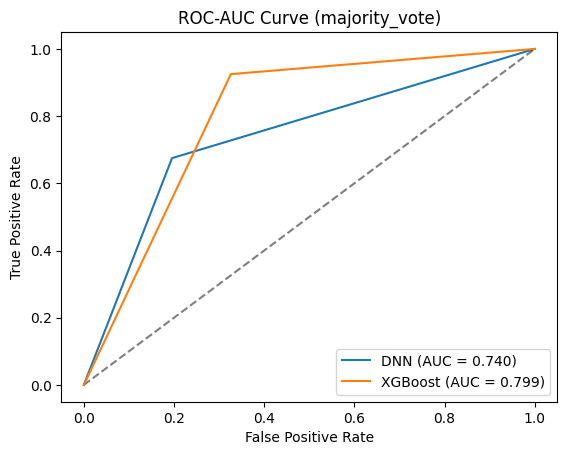

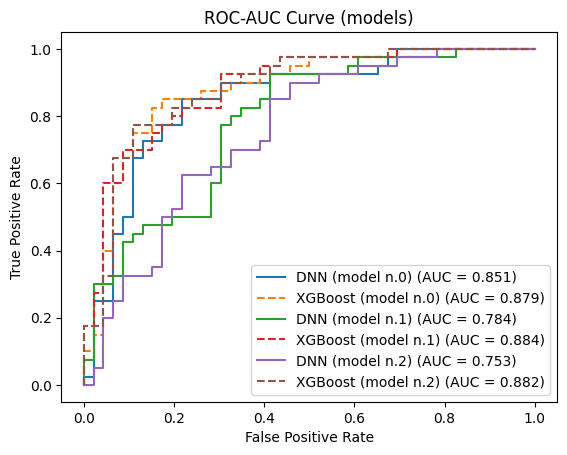

In [51]:
# Plot ROC-AUC curves for DNN and XGBoost models
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['dnn_mean'])
plt.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["dnn_mean"]):.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['xgb_mean'])
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["xgb_mean"]):.3f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (mean)')
plt.show()

fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['dnn_majority_vote'])
plt.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["dnn_majority_vote"]):.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df['xgb_majority_vote'])
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df["xgb_majority_vote"]):.3f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (majority_vote)')
plt.show()

for i in range(3):
    fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df[f'dnn_model_n{i}'])
    plt.plot(fpr, tpr, label=f'DNN (model n.{i}) (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df[f"dnn_model_n{i}"]):.3f})')
    fpr, tpr, _ = roc_curve(result_df['Active'].astype(int), result_df[f'xgb_model_n{i}'])
    plt.plot(fpr, tpr, label=f'XGBoost (model n.{i}) (AUC = {roc_auc_score(result_df["Active"].astype(int), result_df[f"xgb_model_n{i}"]):.3f})', linestyle='dashed')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Curve (models)')
plt.show()
